In [1]:
import sys
sys.path.append("..")

from deepvideo import *

Using TensorFlow backend.


## Converting data

In [2]:
# conv = VideoConverter('../../HMDB-51-dataset/HMDB-51/', 
#                       '../../HMDB-51-dataset/HMDB-51-frames/', 
#                       '../../HMDB-51-dataset/HMDB-51-flow/')

In [3]:
# Converts video to frames
# conv.convert2frames()

## Loading data

In [4]:
(X_train, y_train), (X_test, y_test) = get_hmdb_dataset()

In [5]:
data = VideoLoader(16, input_shape=(16, 244, 244, 3), data_aug=get_augmentations(), label_mapping='../../HMDB-51-dataset/Class Index.txt')

In [6]:
data.from_list('../../HMDB-51-dataset/HMDB-51-frames/', (X_train, y_train), (X_test, y_test))

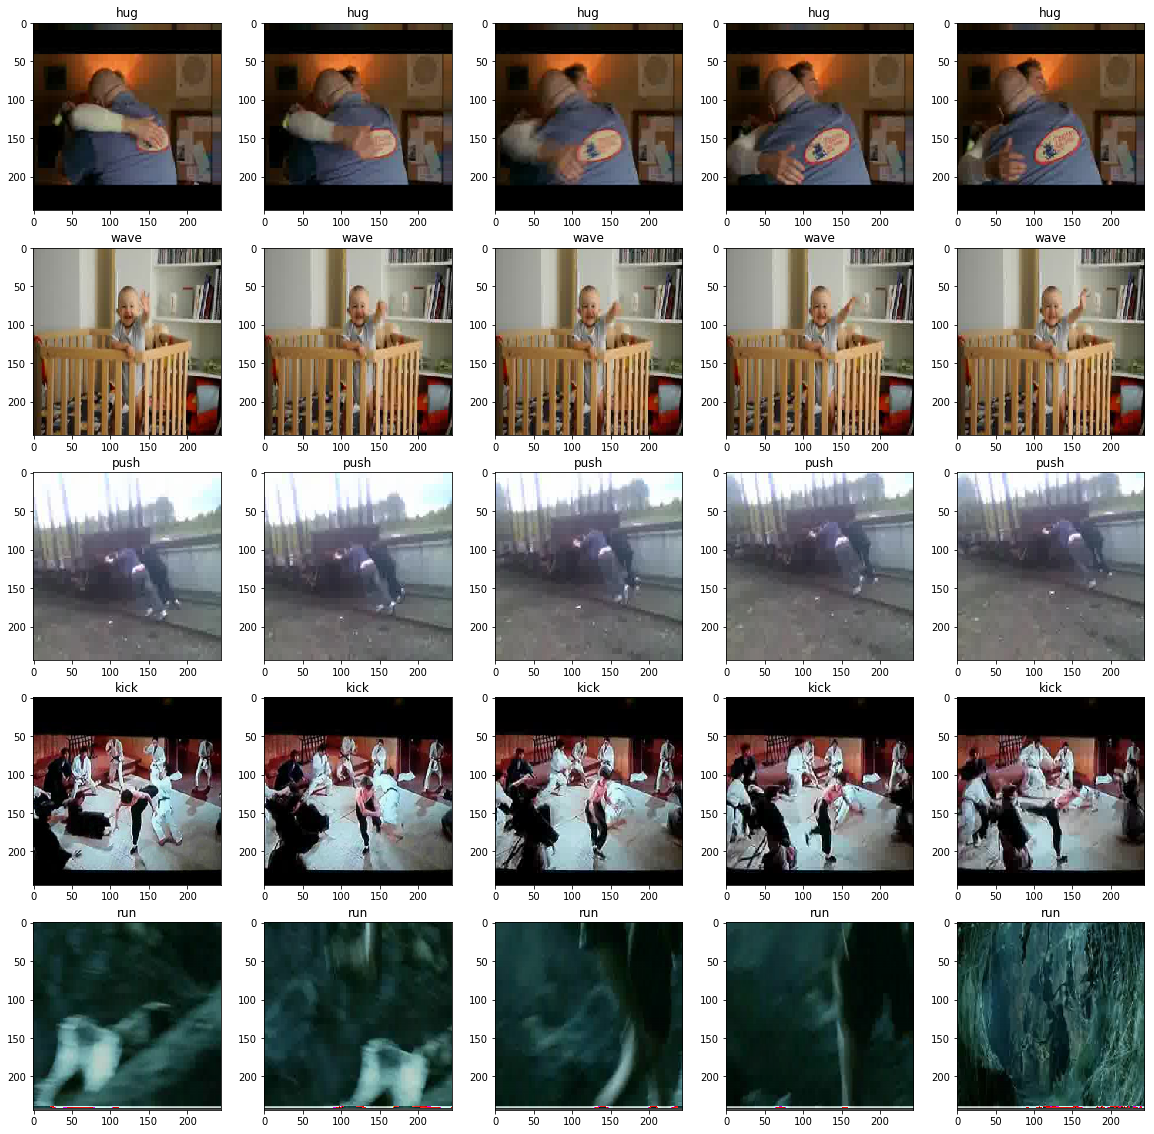

In [7]:
data.show_frames()

In [8]:
data.show_videos()

## Building tfrecord dataset

In [9]:
# data.build_tfrecord_dataset('../tfdataset-hmdb', 10)

  0%|          | 0/1109 [00:00<?, ?it/s]

Making tfrecord dataset at ../tfdataset-hmdb/train and ../tfdataset-hmdb/val


100%|██████████| 46/46 [06:35<00:00,  8.45s/it]


In [9]:
data.use_tfrecord_as_generator('../tfdataset-hmdb/')

## Defining the model

In [10]:
model = I3d_pretrained(classes=data.n_classes, input_shape=data.input_shape)

## Training

In [11]:
learner = VideoLearner(data, model)

In [12]:
learner.unfreeze()

In [13]:
learner.lr_find(2)

Epoch 1/2
189/223 [========================>.....] - ETA: 27s - loss: 3.9440 - acc: 0.0883

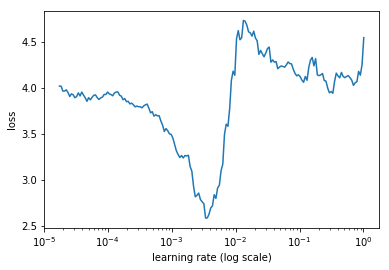

In [14]:
learner.recorder.plot_loss()

In [15]:
learner.fit_one_cycle(10, 0.0004, mode='triangular2')

Epoch 1/10
223/223 [==============================] - 249s 1s/step - loss: 3.7968 - acc: 0.1017 - val_loss: 3.5958 - val_acc: 0.1882
Epoch 2/10
223/223 [==============================] - 224s 1s/step - loss: 3.3280 - acc: 0.3321 - val_loss: 2.9325 - val_acc: 0.3875
Epoch 3/10
223/223 [==============================] - 221s 993ms/step - loss: 2.7686 - acc: 0.4737 - val_loss: 2.3958 - val_acc: 0.4612
Epoch 4/10
223/223 [==============================] - 222s 994ms/step - loss: 2.2964 - acc: 0.5471 - val_loss: 2.0823 - val_acc: 0.5158
Epoch 5/10
223/223 [==============================] - 222s 995ms/step - loss: 1.9204 - acc: 0.6129 - val_loss: 1.8415 - val_acc: 0.5579
Epoch 6/10
223/223 [==============================] - 224s 1s/step - loss: 1.6432 - acc: 0.6648 - val_loss: 1.6806 - val_acc: 0.5941
Epoch 7/10
223/223 [==============================] - 220s 986ms/step - loss: 1.4464 - acc: 0.6839 - val_loss: 1.5678 - val_acc: 0.6053
Epoch 8/10
223/223 [==============================] - 221

In [19]:
learner.save('../models/rgb/i3d_hmdb/i3d_rgb_16f')

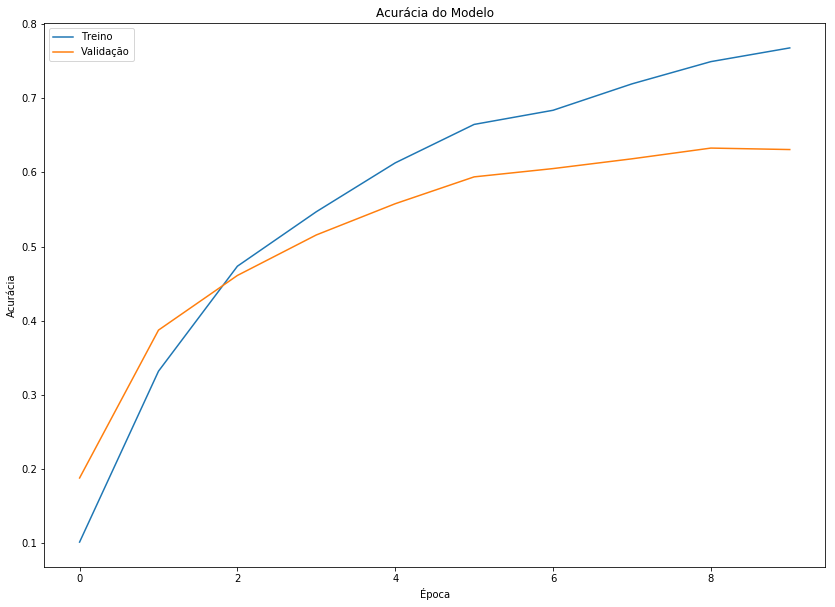

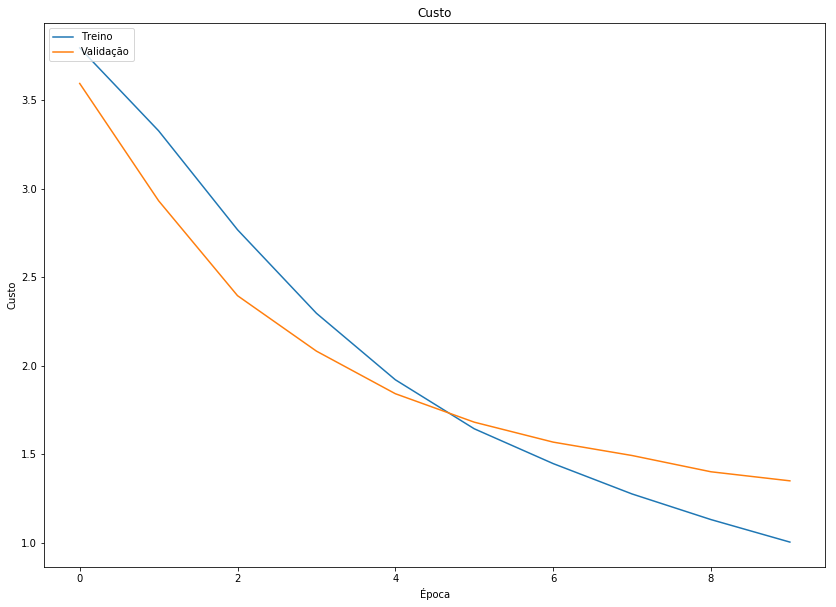

In [20]:
learner.plot_history()

In [21]:
learner.save_report('../models/rgb/i3d_hmdb/')

In [22]:
learner.load('../models/rgb/i3d_hmdb/i3d_rgb_16f')

## Interpreting

In [23]:
interp = VideoClassifier(learner)

100%|██████████| 1530/1530 [31:44<00:00,  1.24s/it]


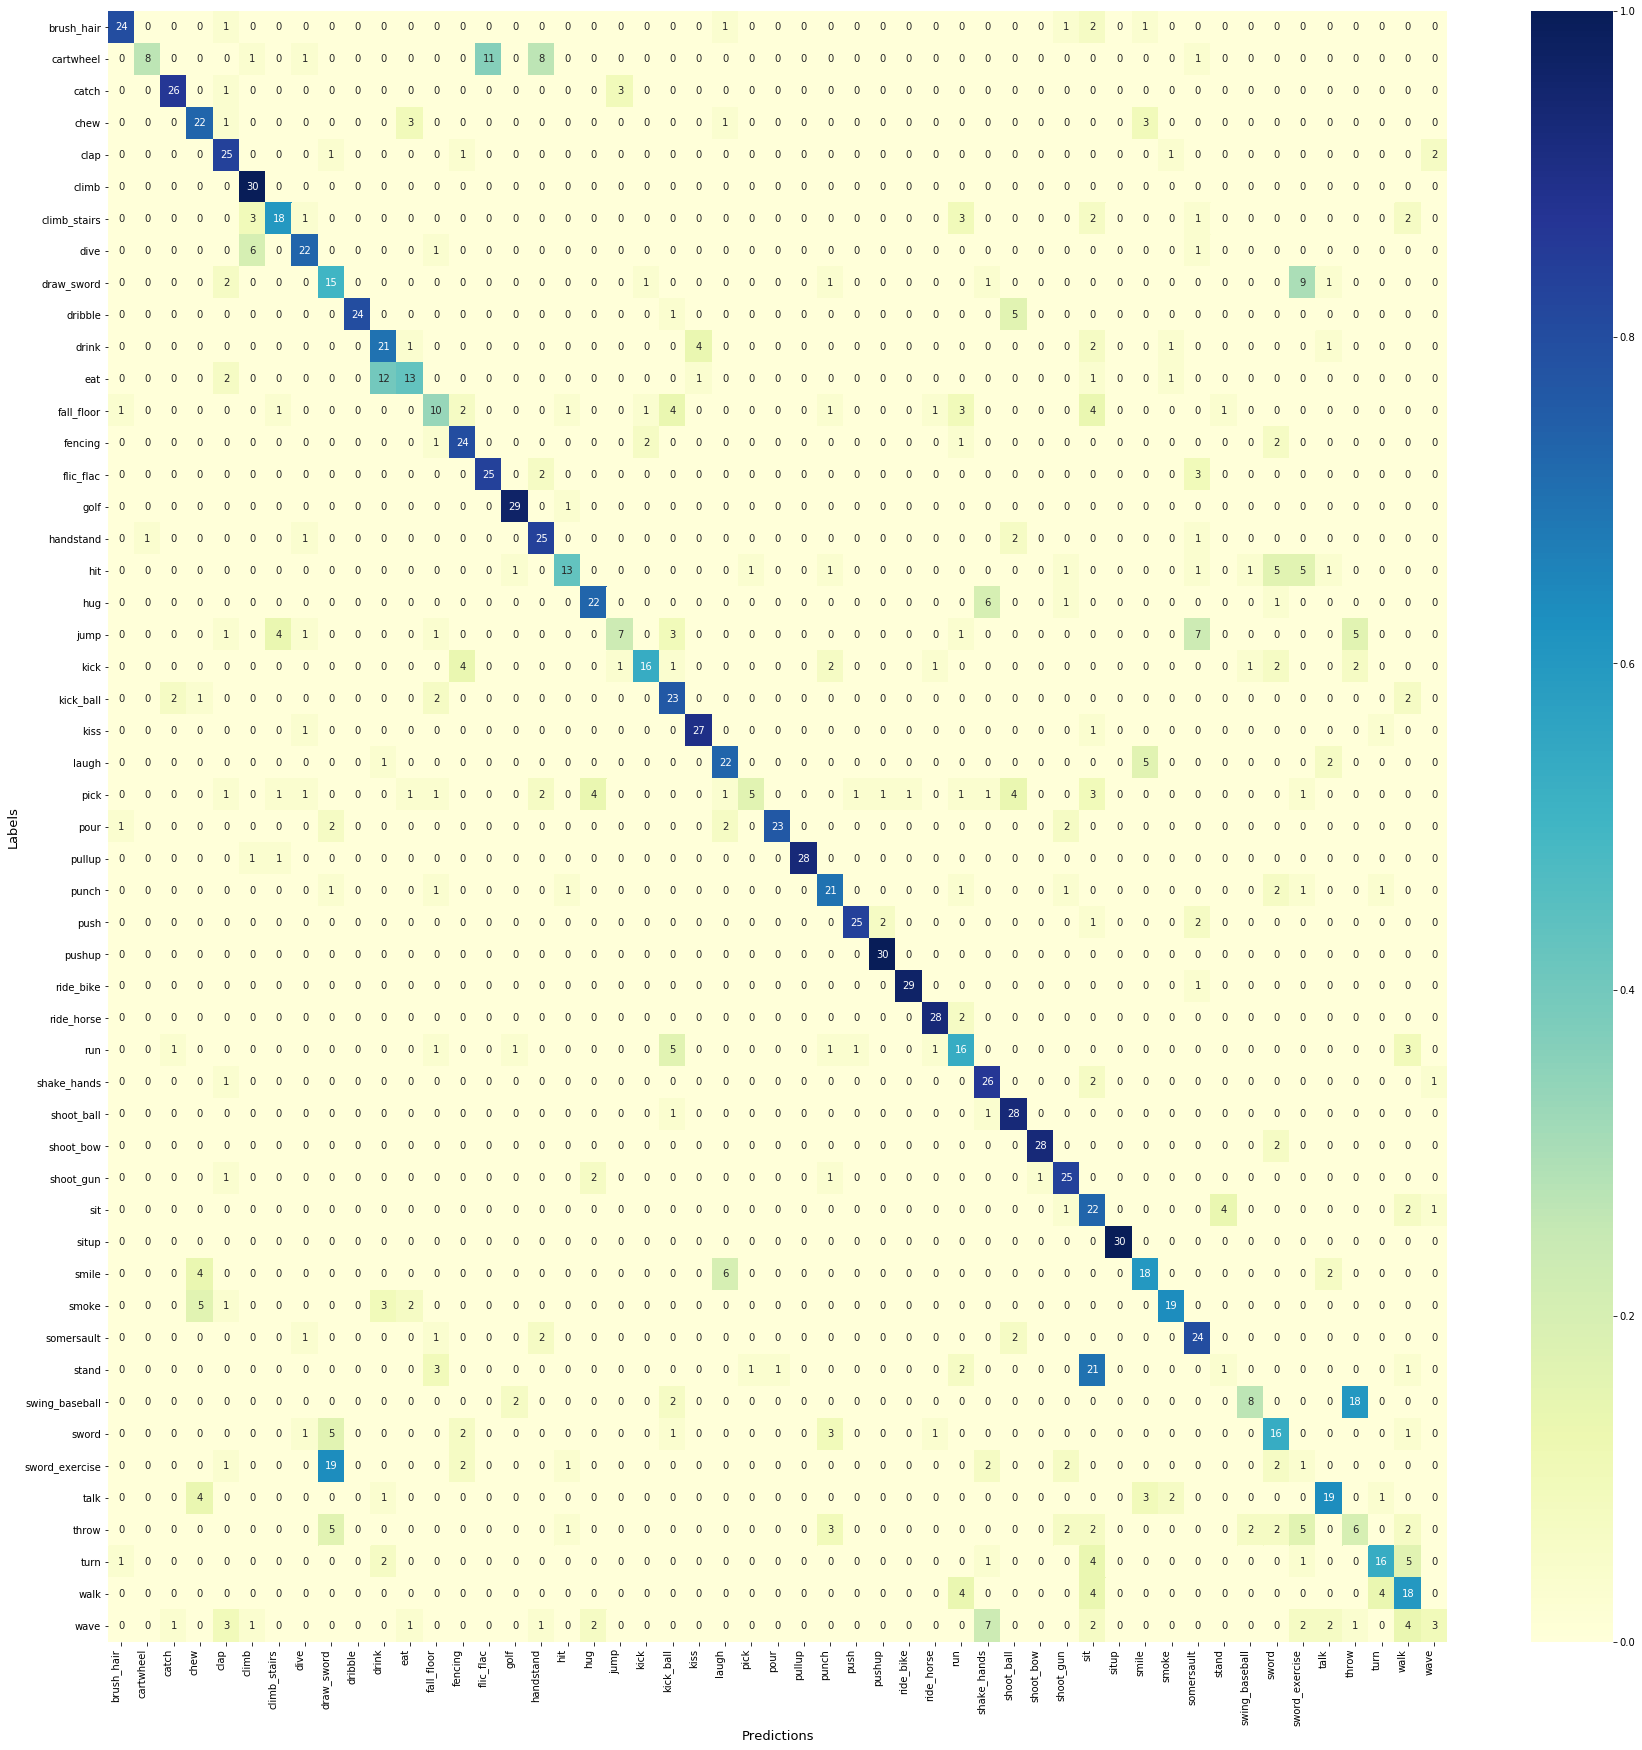

In [24]:
interp.plot_confusion_matrix()

In [25]:
interp.report()

Accuracy: 0.6562091503267974
                precision    recall  f1-score   support

    brush_hair       0.89      0.80      0.84        30
     cartwheel       0.89      0.27      0.41        30
         catch       0.87      0.87      0.87        30
          chew       0.61      0.73      0.67        30
          clap       0.61      0.83      0.70        30
         climb       0.71      1.00      0.83        30
  climb_stairs       0.72      0.60      0.65        30
          dive       0.73      0.73      0.73        30
    draw_sword       0.31      0.50      0.38        30
       dribble       1.00      0.80      0.89        30
         drink       0.53      0.70      0.60        30
           eat       0.62      0.43      0.51        30
    fall_floor       0.45      0.33      0.38        30
       fencing       0.69      0.80      0.74        30
     flic_flac       0.69      0.83      0.76        30
          golf       0.88      0.97      0.92        30
     handstand    